In [43]:
import re, os, sys
import numpy as np
import  pandas as pd
import pyarrow
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import colormaps

# os.getcwd()

'/Users/jma/repos/bayes'

# First view of "marks" data over time, on books in OL

    JMA 1 Oct 2024

The data to be used to test the algorithm for identifying new items of interest.  Those items whose rate of appearance jumps up suddenly are likely to be increasing in popularity.  

_TL;TR_


- Of the ~ 2.5 million entries, the top few hundred comprise most of the data entries

- Most all the data is dated from mid 2020 onwards.  This corresponds to COVID onset. 

- The counts data  is plotted on a log scale, so the increase is __4 orders of magnitude!__

In [120]:
os.chdir('/Users/jma/repos/bayes/')
readings_df = pd.read_parquet('ol_dump_reading-log_2024-08-31.parquet')

# How many unique items are there?
readings_df.work_key.unique().size

2478423

Text(0.5, 1.0, 'Decline in number of appearances for the top 200 works.')

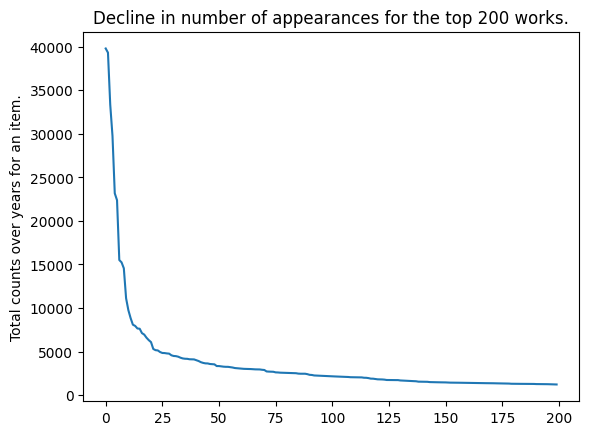

In [45]:
# What does the long tail of items look like, in terms of counts?
multiple_readings = readings_df.work_key.value_counts()
multiple_readings  = multiple_readings[multiple_readings > 1]
plt.plot(list(range(200)), multiple_readings[:200])
plt.ylabel("Total counts over years for an item.")
plt.title("Decline in number of appearances for the top 200 works.")

['/works/OL18020194W', '/works/OL17930368W', '/works/OL1968368W', '/works/OL17590212W', '/works/OL35351151W', '/works/OL2010879W']	

Text(0.5, 1.0, 'Trends for the 6 most popular items')

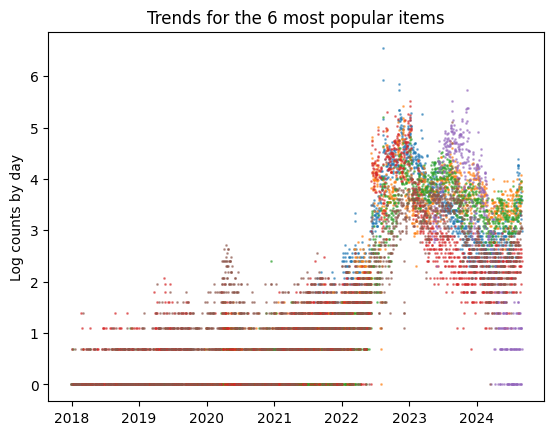

In [46]:
# Plot most popular items over time
# The top 6 most popular works all have similar distributions over time

def item_timeseries(work_item, df=readings_df):
    item_df = df[df.work_key == work_item]               # Select rows
    a_time_series = item_df[['work_key', 'date']]        # Select columns
    ts = a_time_series.date.value_counts().sort_index()  # Count occurrences over time. 
    return ts

# Most popular items
populars = ['/works/OL18020194W', '/works/OL17930368W', '/works/OL1968368W', '/works/OL17590212W', '/works/OL35351151W', '/works/OL2010879W']	

for k, item in enumerate(populars):
    plt.plot(np.log(item_timeseries(item)), '.', markersize=2, color=f'C{k}', alpha = 0.5)

plt.ylabel('Log counts by day')
plt.title('Trends for the 6 most popular items')

In [113]:
# Combine the events for the most popular items. 

# Merge the most  popular items into one set. 
merged_series = pd.Series()
for k, item in enumerate(populars):
    one_series = np.log(item_timeseries(item))
    merged_series = pd.concat([merged_series, one_series])

merged_series_sorted = merged_series.sort_index()

/var/folders/x3/t7qpngm57q96p9wxzg9rqv6h0000gp/T/ipykernel_84231/3749138145.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  merged_series = pd.concat([merged_series, one_series])


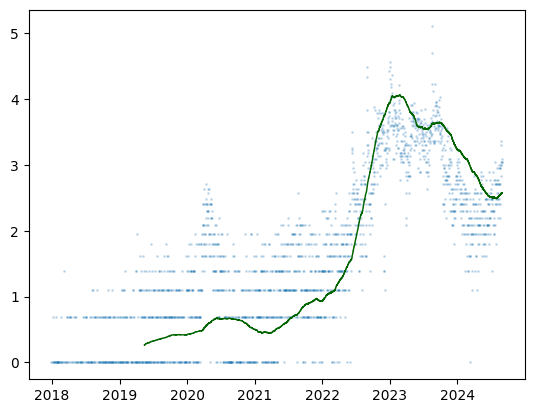

In [116]:
# Time-average the counts of the most popular items for a better view of the trend. 
smoothed_series_sorted = merged_series_sorted.rolling(window = 700).mean()
plt.plot(np.log(item_timeseries(item)), '.', markersize=2, alpha = 0.2)
plt.plot(smoothed_series_sorted, color= 'darkgreen', linewidth = 1)